In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report


In [4]:
data=pd.read_csv(r"C:\Users\pc\Downloads\data.csv")


In [5]:
data.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [6]:
data.columns

Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId',
       'ProductCategory', 'ChannelId', 'Amount', 'Value',
       'TransactionStartTime', 'PricingStrategy', 'FraudResult'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

In [8]:
data.shape

(95662, 16)

In [9]:
data.describe()

,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


In [12]:
summary_stats=data.describe(include='all')
summary_stats

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
count,95662,95662,95662,95662,95662,95662,95662.0,95662,95662,95662,95662,9.566200e+04,9.566200e+04,95662,95662.000000,95662.000000
unique,95662,94809,3633,3627,3742,1,NaN,6,23,9,4,NaN,NaN,94556,NaN,NaN
top,TransactionId_35670,BatchId_67019,AccountId_4841,SubscriptionId_3829,CustomerId_7343,UGX,NaN,ProviderId_4,ProductId_6,financial_services,ChannelId_3,NaN,NaN,2018-12-24T16:30:13Z,NaN,NaN
freq,1,28,30893,32630,4091,95662,NaN,38189,32635,45405,56935,NaN,NaN,17,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,256.0,NaN,NaN,NaN,NaN,6.717846e+03,9.900584e+03,NaN,2.255974,0.002018
std,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1.233068e+05,1.231221e+05,NaN,0.732924,0.044872
min,NaN,NaN,NaN,NaN,NaN,NaN,256.0,NaN,NaN,NaN,NaN,-1.000000e+06,2.000000e+00,NaN,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,256.0,NaN,NaN,NaN,NaN,-5.000000e+01,2.750000e+02,NaN,2.000000,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,256.0,NaN,NaN,NaN,NaN,1.000000e+03,1.000000e+03,NaN,2.000000,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,256.0,NaN,NaN,NaN,NaN,2.800000e+03,5.000000e+03,NaN,2.000000,0.000000


In [14]:
numeric_data=data.select_dtypes(include=[float,int])

In [19]:
skewness=numeric_data.skew()
kurtosis=numeric_data.kurtosis()

In [20]:
skewness

CountryCode         0.000000
Amount             51.098490
Value              51.291086
PricingStrategy     1.659057
FraudResult        22.196295
dtype: float64

In [21]:
kurtosis

CountryCode           0.000000
Amount             3363.127739
Value              3378.069274
PricingStrategy       2.087534
FraudResult         490.685762
dtype: float64

Distribution of Numerical Features

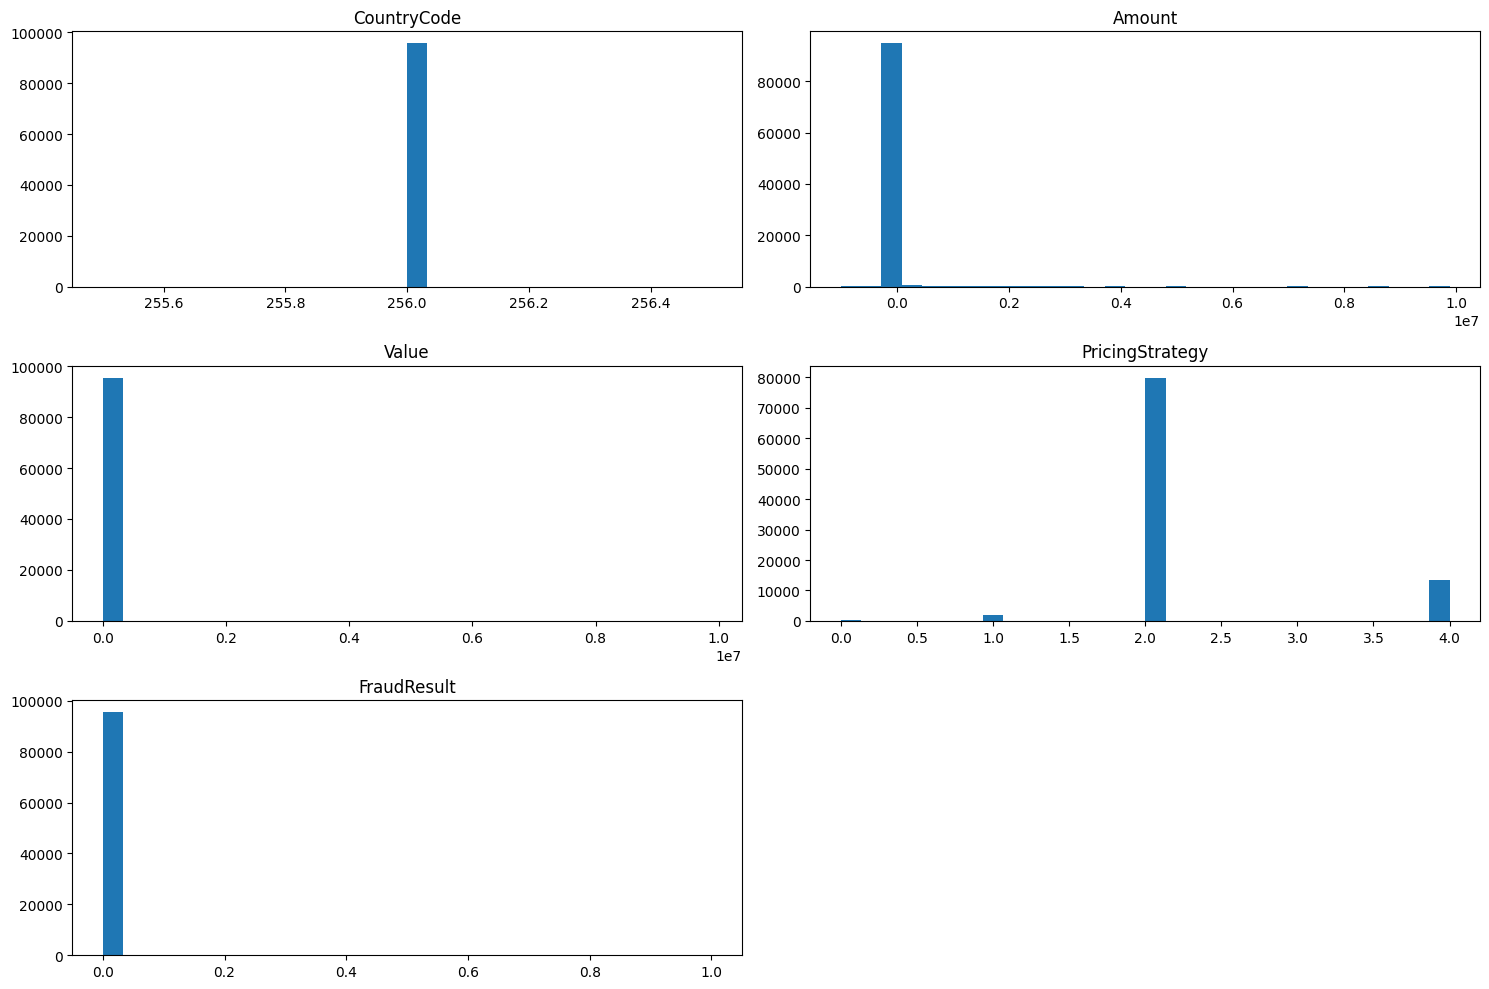

In [22]:
#Histograms provide a visual representation of the frequency distribution of a numerical feature.
numeric_data.hist(bins=30, figsize=(15, 10), grid=False) #
plt.tight_layout()
plt.show()

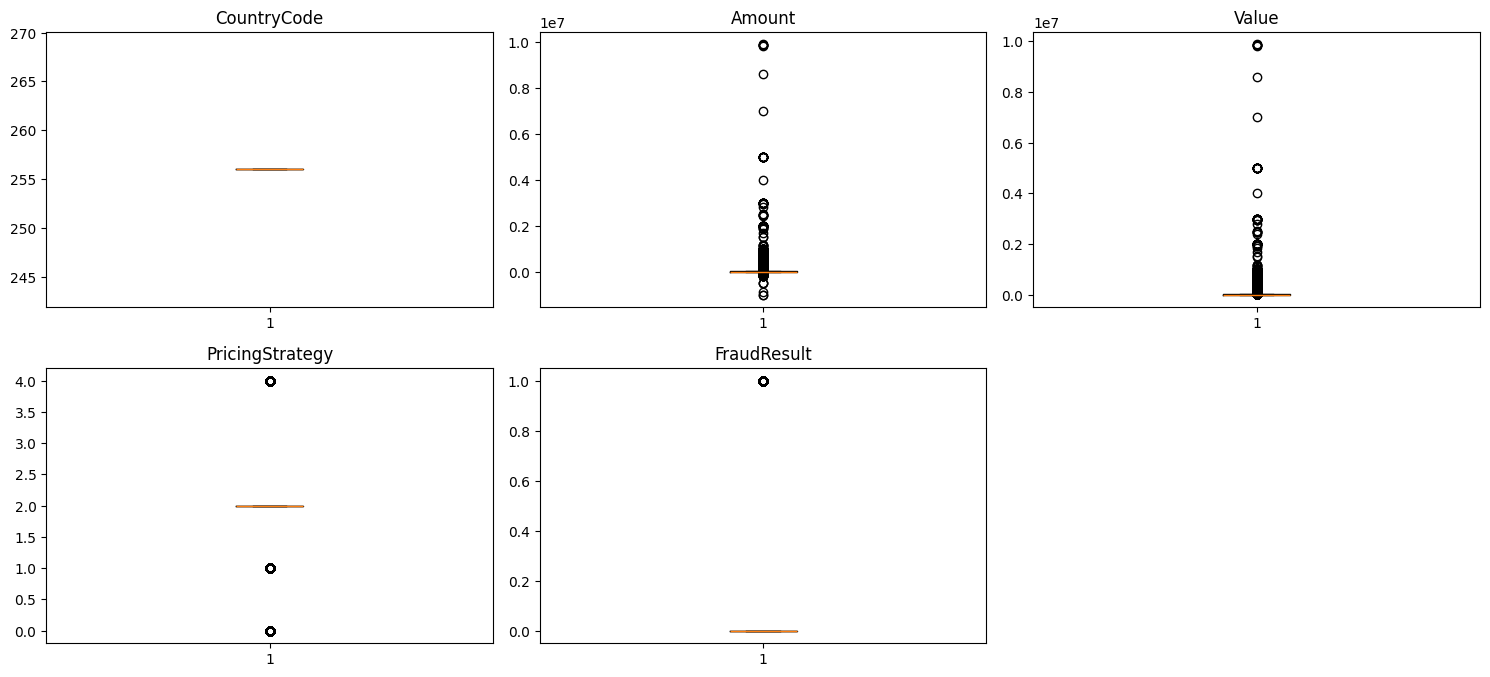

In [23]:
# Plot box plots for each numeric feature
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_data.columns, 1):
    plt.subplot(3, 3, i)
    plt.boxplot(numeric_data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [27]:
categorical_data=data.select_dtypes(include=[object])

In [28]:
categorical_data

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,ProviderId,ProductId,ProductCategory,ChannelId,TransactionStartTime
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,ProviderId_6,ProductId_10,airtime,ChannelId_3,2018-11-15T02:18:49Z
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,ProviderId_4,ProductId_6,financial_services,ChannelId_2,2018-11-15T02:19:08Z
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,ProviderId_6,ProductId_1,airtime,ChannelId_3,2018-11-15T02:44:21Z
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,2018-11-15T03:32:55Z
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,ProviderId_4,ProductId_6,financial_services,ChannelId_2,2018-11-15T03:34:21Z
...,...,...,...,...,...,...,...,...,...,...,...
95657,TransactionId_89881,BatchId_96668,AccountId_4841,SubscriptionId_3829,CustomerId_3078,UGX,ProviderId_4,ProductId_6,financial_services,ChannelId_2,2019-02-13T09:54:09Z
95658,TransactionId_91597,BatchId_3503,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,ProviderId_6,ProductId_10,airtime,ChannelId_3,2019-02-13T09:54:25Z
95659,TransactionId_82501,BatchId_118602,AccountId_4841,SubscriptionId_3829,CustomerId_3874,UGX,ProviderId_4,ProductId_6,financial_services,ChannelId_2,2019-02-13T09:54:35Z
95660,TransactionId_136354,BatchId_70924,AccountId_1346,SubscriptionId_652,CustomerId_1709,UGX,ProviderId_6,ProductId_19,tv,ChannelId_3,2019-02-13T10:01:10Z


In [29]:
categorical_data.columns

Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'CurrencyCode', 'ProviderId', 'ProductId', 'ProductCategory',
       'ChannelId', 'TransactionStartTime'],
      dtype='object')

Correlation Analysis

In [30]:
# Calculate the correlation matrix, it uses Pearson correlation, which is appropriate for normally distributed data.
correlation_matrix = numeric_data.corr()

In [31]:
correlation_matrix

,CountryCode,Amount,Value,PricingStrategy,FraudResult
CountryCode,NaN,NaN,NaN,NaN,NaN
Amount,NaN,1.000000,0.989692,-0.061931,0.557370
Value,NaN,0.989692,1.000000,-0.017020,0.566739
PricingStrategy,NaN,-0.061931,-0.017020,1.000000,-0.033821
FraudResult,NaN,0.557370,0.566739,-0.033821,1.000000


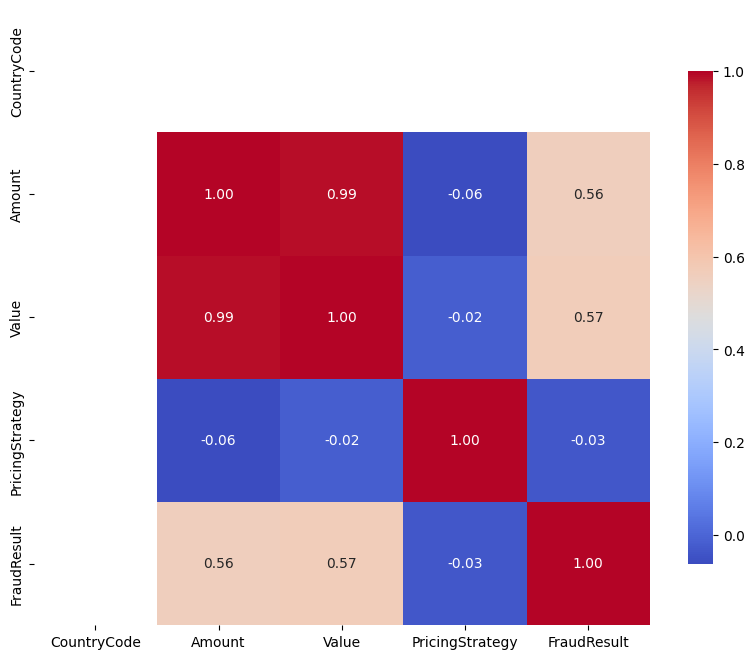

In [32]:
# matplotlib figure
plt.figure(figsize=(10, 8))

# heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.show()

feature engineering(task-2)

In [33]:
# group by 'CustomerId'
aggregated_data = data.groupby('CustomerId').agg(
    Total_Transaction_Amount=('Amount', 'sum'),        # Sum of all transaction amounts for each customer.
    Average_Transaction_Amount=('Amount', 'mean'),     # Average transaction amount per customer.
    Transaction_Count=('Amount', 'count'),             # Number of transactions per customer.
    Std_Deviation_Transaction_Amount=('Amount', 'std'),# Variability of transaction amounts per customer.
).reset_index

In [34]:
aggregated_data1 = data.groupby('CustomerId').agg(
    Average_Debit_Amount=('Amount', lambda x: x[x > 0].mean()),  # average value of debits transaction
    Average_Credit_Amount=('Amount', lambda x: x[x < 0].mean()),  # average of credits transaction
    Total_Absolute_Transaction_Amount=('Amount', lambda x: x.abs().sum()),  # total absolute amount
    Total_Debits=('Amount', lambda x: x[x > 0].sum()),  # Total debits
    Total_Credits=('Amount', lambda x: x[x < 0].sum())  # Total credits
).reset_index()

Extracting Features

In [35]:
#convert the 'TransactionTime' column to datetime format
data['TransactionStartTime'] = pd.to_datetime(data['TransactionStartTime'])

#extract features
data['Transaction_Hour'] = data['TransactionStartTime'].dt.hour  # Extract hour
data['Transaction_Day'] = data['TransactionStartTime'].dt.day  # Extract day of the month
data['Transaction_Month'] = data['TransactionStartTime'].dt.month  # Extract month
data['Transaction_Year'] = data['TransactionStartTime'].dt.year  # Extract year
# Count transactions per CustomerId and add it as a new column
data['TransactionCount'] = data.groupby('CustomerId')['CustomerId'].transform('count')

In [36]:
# Extract day of the week (0=Monday, 6=Sunday)
data['Transaction_Day_of_Week'] = data['TransactionStartTime'].dt.dayofweek
# Check if the transaction occurred on a weekend
data['Is_Weekend'] = data['Transaction_Day_of_Week'].apply(lambda x: 1 if x >= 5 else 0)  # 1 for Saturday/Sunday, 0 otherwis

In [38]:
data['Transaction_Quarter'] = data['TransactionStartTime'].dt.quarter

In [39]:
data

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,...,PricingStrategy,FraudResult,Transaction_Hour,Transaction_Day,Transaction_Month,Transaction_Year,TransactionCount,Transaction_Day_of_Week,Is_Weekend,Transaction_Quarter
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,...,2,0,2,15,11,2018,119,3,0,4
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,...,2,0,2,15,11,2018,119,3,0,4
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,...,2,0,2,15,11,2018,2,3,0,4
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,...,2,0,3,15,11,2018,38,3,0,4
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,...,2,0,3,15,11,2018,38,3,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,TransactionId_89881,BatchId_96668,AccountId_4841,SubscriptionId_3829,CustomerId_3078,UGX,256,ProviderId_4,ProductId_6,financial_services,...,2,0,9,13,2,2019,573,2,0,1
95658,TransactionId_91597,BatchId_3503,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,ProviderId_6,ProductId_10,airtime,...,2,0,9,13,2,2019,43,2,0,1
95659,TransactionId_82501,BatchId_118602,AccountId_4841,SubscriptionId_3829,CustomerId_3874,UGX,256,ProviderId_4,ProductId_6,financial_services,...,2,0,9,13,2,2019,43,2,0,1
95660,TransactionId_136354,BatchId_70924,AccountId_1346,SubscriptionId_652,CustomerId_1709,UGX,256,ProviderId_6,ProductId_19,tv,...,2,0,10,13,2,2019,524,2,0,1


Encode Categorical Variables to numerical

In [40]:
# Separate categorical and numerical columns
categorical_cols = data.select_dtypes(include=['object', 'category']).columns
numerical_cols = data.select_dtypes(include=['number']).columns

# Create DataFrames for categorical and numerical features
categorical_data = data[categorical_cols]
numerical_data = data[numerical_cols]

In [41]:
# Count unique categories for each categorical variable
unique_counts = categorical_data.nunique()
print(unique_counts)

TransactionId      95662
BatchId            94809
AccountId           3633
SubscriptionId      3627
CustomerId          3742
CurrencyCode           1
ProviderId             6
ProductId             23
ProductCategory        9
ChannelId              4
dtype: int64


In [42]:
categorical_data

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,ProviderId,ProductId,ProductCategory,ChannelId
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,ProviderId_6,ProductId_10,airtime,ChannelId_3
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,ProviderId_4,ProductId_6,financial_services,ChannelId_2
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,ProviderId_6,ProductId_1,airtime,ChannelId_3
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,ProviderId_1,ProductId_21,utility_bill,ChannelId_3
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,ProviderId_4,ProductId_6,financial_services,ChannelId_2
...,...,...,...,...,...,...,...,...,...,...
95657,TransactionId_89881,BatchId_96668,AccountId_4841,SubscriptionId_3829,CustomerId_3078,UGX,ProviderId_4,ProductId_6,financial_services,ChannelId_2
95658,TransactionId_91597,BatchId_3503,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,ProviderId_6,ProductId_10,airtime,ChannelId_3
95659,TransactionId_82501,BatchId_118602,AccountId_4841,SubscriptionId_3829,CustomerId_3874,UGX,ProviderId_4,ProductId_6,financial_services,ChannelId_2
95660,TransactionId_136354,BatchId_70924,AccountId_1346,SubscriptionId_652,CustomerId_1709,UGX,ProviderId_6,ProductId_19,tv,ChannelId_3


In [43]:
# Drop unique identifier columns
categorical_data = categorical_data.drop(columns=['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId'])

In [44]:
# One-Hot Encoding for nominal variables
categorical_encoded = pd.get_dummies(categorical_data, columns=['CurrencyCode','ProviderId', 'ProductId', 'ProductCategory', 'ChannelId'], drop_first=True)

In [45]:
categorical_encoded

,CustomerId,ProviderId_ProviderId_2,ProviderId_ProviderId_3,ProviderId_ProviderId_4,ProviderId_ProviderId_5,ProviderId_ProviderId_6,ProductId_ProductId_10,ProductId_ProductId_11,ProductId_ProductId_12,ProductId_ProductId_13,...,ProductCategory_financial_services,ProductCategory_movies,ProductCategory_other,ProductCategory_ticket,ProductCategory_transport,ProductCategory_tv,ProductCategory_utility_bill,ChannelId_ChannelId_2,ChannelId_ChannelId_3,ChannelId_ChannelId_5
0,CustomerId_4406,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,CustomerId_4406,False,False,True,False,False,False,False,False,False,...,True,False,False,False,False,False,False,True,False,False
2,CustomerId_4683,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,CustomerId_988,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
4,CustomerId_988,False,False,True,False,False,False,False,False,False,...,True,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,CustomerId_3078,False,False,True,False,False,False,False,False,False,...,True,False,False,False,False,False,False,True,False,False
95658,CustomerId_3874,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
95659,CustomerId_3874,False,False,True,False,False,False,False,False,False,...,True,False,False,False,False,False,False,True,False,False
95660,CustomerId_1709,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False


Standardize Numerical Features

In [46]:
# initialize the scaler
scaler = MinMaxScaler()

In [47]:
# standardize the features
numerical_encoded = pd.DataFrame(scaler.fit_transform(numerical_data), columns=numerical_data.columns)
numerical_encoded

,CountryCode,Amount,Value,PricingStrategy,FraudResult,Transaction_Hour,Transaction_Day,Transaction_Month,Transaction_Year,TransactionCount,Transaction_Day_of_Week,Is_Weekend,Transaction_Quarter
0,0.0,0.092004,0.000101,0.5,0.0,0.086957,0.466667,0.909091,0.0,0.028851,0.500000,0.0,1.0
1,0.0,0.091910,0.000002,0.5,0.0,0.086957,0.466667,0.909091,0.0,0.028851,0.500000,0.0,1.0
2,0.0,0.091958,0.000050,0.5,0.0,0.086957,0.466667,0.909091,0.0,0.000244,0.500000,0.0,1.0
3,0.0,0.093750,0.002206,0.5,0.0,0.130435,0.466667,0.909091,0.0,0.009046,0.500000,0.0,1.0
4,0.0,0.091853,0.000065,0.5,0.0,0.130435,0.466667,0.909091,0.0,0.009046,0.500000,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,0.0,0.091820,0.000101,0.5,0.0,0.391304,0.400000,0.090909,1.0,0.139853,0.333333,0.0,0.0
95658,0.0,0.092004,0.000101,0.5,0.0,0.391304,0.400000,0.090909,1.0,0.010269,0.333333,0.0,0.0
95659,0.0,0.091910,0.000002,0.5,0.0,0.391304,0.400000,0.090909,1.0,0.010269,0.333333,0.0,0.0
95660,0.0,0.092188,0.000303,0.5,0.0,0.434783,0.400000,0.090909,1.0,0.127873,0.333333,0.0,0.0


In [48]:
# Concatenate the DataFrames along columns (axis=1)
encoded_data = pd.concat([numerical_encoded, categorical_encoded], axis=1)

construct a default estimator (proxy)(task-3)

In [50]:
# Calculate current date
current_date = data['TransactionStartTime'].max()

In [51]:
# Group by CustomerId and aggregate
rfms = data.groupby('CustomerId').agg(
    Recency=('TransactionStartTime', lambda x: (current_date - x.max()).days),
    Frequency=('TransactionStartTime', 'count'),
    Monetary=('Amount', 'sum')
).reset_index()

In [52]:
rfms

,CustomerId,Recency,Frequency,Monetary
0,CustomerId_1,83,1,-10000.0
1,CustomerId_10,83,1,-10000.0
2,CustomerId_1001,89,5,20000.0
3,CustomerId_1002,25,11,4225.0
4,CustomerId_1003,11,6,20000.0
...,...,...,...,...
3737,CustomerId_992,4,6,20000.0
3738,CustomerId_993,25,5,20000.0
3739,CustomerId_994,0,101,543873.0
3740,CustomerId_996,67,17,139000.0


Classify Users as Good or Bad

In [53]:
# define thresholds for classification
recency_threshold = rfms['Recency'].median()  # Example threshold
frequency_threshold = rfms['Frequency'].median()  # Example threshold
monetary_threshold = rfms['Monetary'].median()  # Example threshold

# assign labels
def classify_user(row):
    if (row['Recency'] <= recency_threshold) and (row['Frequency'] >= frequency_threshold) and (row['Monetary'] >= monetary_threshold):
        return 'Good'
    else:
        return 'Bad'

rfms['Label'] = rfms.apply(classify_user, axis=1)

In [54]:
rfms

,CustomerId,Recency,Frequency,Monetary,Label
0,CustomerId_1,83,1,-10000.0,Bad
1,CustomerId_10,83,1,-10000.0,Bad
2,CustomerId_1001,89,5,20000.0,Bad
3,CustomerId_1002,25,11,4225.0,Bad
4,CustomerId_1003,11,6,20000.0,Bad
...,...,...,...,...,...
3737,CustomerId_992,4,6,20000.0,Bad
3738,CustomerId_993,25,5,20000.0,Bad
3739,CustomerId_994,0,101,543873.0,Good
3740,CustomerId_996,67,17,139000.0,Bad


Visualizing RFMS Space

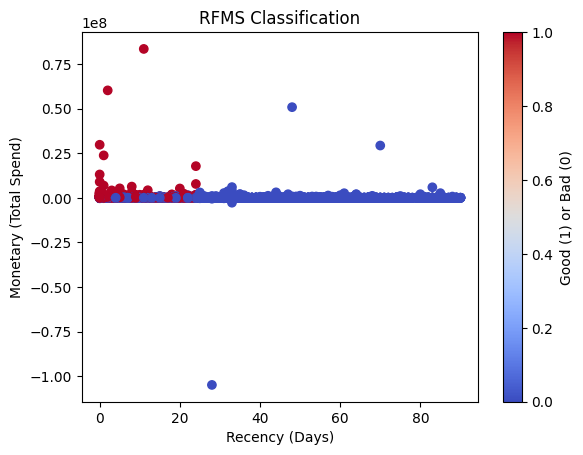

In [55]:
plt.scatter(rfms['Recency'], rfms['Monetary'], c=rfms['Label'].apply(lambda x: 1 if x == 'Good' else 0), cmap='coolwarm')
plt.xlabel('Recency (Days)')
plt.ylabel('Monetary (Total Spend)')
plt.title('RFMS Classification')
plt.colorbar(label='Good (1) or Bad (0)')
plt.show()